In [1]:
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import matplotlib
import h5py
import plotly.graph_objs as go
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display, HTML
plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))
import pandas as pd
import sys
import os
import re

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(rf'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [2]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]

a=1


In [3]:
data_field_intensities={}

directory = r"H:\phd stuff\tidy3d\data"
for path_direction in [
  r"H:\phd stuff\tidy3d\data\20250625 2D eps 45 4-9GHz Different Dipole Position\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=4.9", #2D Experiment eps 45
  r"H:\phd stuff\tidy3d\data\20250721 0mm Gap Cavity 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=11",#Separation 0mm Antenna placed at the z=0
  r"H:\phd stuff\tidy3d\data\20250729 0.15mm Gap Cavity 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=11",#Separation 0.15mm Antenna placed at the z=0
  r"H:\phd stuff\tidy3d\data\20250721 0.30mm Gap Cavity 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=11",#Separation 0.3mm Antenna placed at the z=0
  r"H:\phd stuff\tidy3d\data\20250721 0.50mm Gap Cavity 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=11",#Separation 0.5mm Antenna placed at the z=0
  r"H:\phd stuff\tidy3d\data\20250721 0.55mm Gap Cavity 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=11",#Separation 0.55mm Antenna placed at the z=0
  r"H:\phd stuff\tidy3d\data\20250721 0.65mm Gap Cavity 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=11",#Separation 0.65mm Antenna placed at the z=0
  r"H:\phd stuff\tidy3d\data\20250721 1mm Gap Cavity 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=11",#Separation 1mm Antenna placed at the z=0
                       ]:
  sim_name = str(Path(*Path(path_direction).parts[-3:-2]))
  print(sim_name)
  if sim_name not in data_field_intensities:
        data_field_intensities[sim_name] = {}

  folder_path = f"{path_direction}"

  for i,filename in enumerate(natsorted(os.listdir(folder_path))):
    if not Path(filename).suffix==".txt":
      continue
    print(filename)
    ##get emitter position 
    emitter_x= float(re.search(r'emmiter_([+-]?\d+(?:\.\d+)?)', filename).group(1))

    if os.path.isfile(os.path.join(folder_path, filename)):
      file=os.path.join(folder_path, filename)
      structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
      sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
     
      lambdas= ((td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs)))
      freqs = 3e10/(lambdas)  * 1e-9
     
      field =sim_data["freq_monitorFieldOut"].Ez
      field_ref =sim_data0["freq_monitorFieldOut"].Ez

      if emitter_x not in data_field_intensities[sim_name]:
        data_field_intensities[sim_name][emitter_x] = {}
      #Get the line at the back of the slab
      indices_x = np.where(np.abs(field["x"])<=50)[0]
      indices_y = np.array([np.where(np.bool_(field["y"]<=(10)))[0][-1]])
      indices_y_ref = np.array([np.where(np.bool_(field["y"]<=(-5.5555)))[0][-1]])
      
      data_field_intensities[sim_name][emitter_x]["field_empty_cavity"] =field_ref[indices_x,indices_y_ref,:].values.squeeze()
      data_field_intensities[sim_name][emitter_x]["field_slab_cavity"] =field[indices_x,indices_y,:].values.squeeze()
      data_field_intensities[sim_name][emitter_x]["freqs"]=freqs
      data_field_intensities[sim_name][emitter_x]["line_x"]=field["x"][indices_x]
 


20250625 2D eps 45 4-9GHz Different Dipole Position
chi_0.37_N_10000_posics_emmiter_0.5000 - Sample_0.txt
Configured successfully.


15:11:40 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_1.5000 - Sample_0.txt
Configured successfully.


15:11:49 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_2.5000 - Sample_0.txt
Configured successfully.


15:11:59 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_3.5000 - Sample_0.txt
Configured successfully.


15:12:08 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_4.5000 - Sample_0.txt
Configured successfully.


15:12:18 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_5.5000 - Sample_0.txt
Configured successfully.


15:12:28 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-0.5000 - Sample_0.txt
Configured successfully.


15:12:38 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-1.5000 - Sample_0.txt
Configured successfully.


15:12:47 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-2.5000 - Sample_0.txt
Configured successfully.


15:12:57 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-3.5000 - Sample_0.txt
Configured successfully.


15:13:07 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-4.5000 - Sample_0.txt
Configured successfully.


15:13:16 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-5.5000 - Sample_0.txt
Configured successfully.


15:13:26 W. Europe Daylight Time WARNING: The grid step in x has a value of     
                                 0.1323 (um), which was detected as being large 
                                 when compared to the central wavelength of     
                                 sources[0] within the medium associated with   
                                 structures[0], given by 0.7512 (um). To avoid  
                                 inaccuracies, it is recommended the grid size  
                                 is reduced.                                    

                                 WARNING: Suppressed 2 WARNING messages.        

20250721 0mm Gap Cavity 3D
chi_0.37_N_10000_posics_emmiter_0.5000 - Sample_0.txt
Configured successfully.


15:13:37 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_1.5000 - Sample_0.txt
Configured successfully.


15:13:49 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_2.5000 - Sample_0.txt
Configured successfully.


15:14:01 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_3.5000 - Sample_0.txt
Configured successfully.


15:14:13 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_4.5000 - Sample_0.txt
Configured successfully.


15:14:25 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_5.5000 - Sample_0.txt
Configured successfully.


15:14:37 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-0.5000 - Sample_0.txt
Configured successfully.


15:14:49 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-1.5000 - Sample_0.txt
Configured successfully.


15:15:01 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-2.5000 - Sample_0.txt
Configured successfully.


15:15:13 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-3.5000 - Sample_0.txt
Configured successfully.


15:15:25 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-4.5000 - Sample_0.txt
Configured successfully.


15:15:36 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

chi_0.37_N_10000_posics_emmiter_-5.5000 - Sample_0.txt
Configured successfully.


15:15:48 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 2 WARNING messages.        

20250729 0.15mm Gap Cavity 3D
chi_0.37_N_10000_posics_emmiter_0.5000 - Sample_0.txt
Configured successfully.


Output()

15:26:00 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_0.5000
                                  - Sample_0.txt/Data_0.hdf5

15:26:03 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.67e-11 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

15:35:48 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_0.5000
                                  - Sample_0.txt/Data.hdf5

15:35:52 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 2.72e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

15:35:53 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_1.5000 - Sample_0.txt
Configured successfully.


Output()

15:45:56 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_1.5000
                                  - Sample_0.txt/Data_0.hdf5

15:46:00 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.6e-11 is greater than the simulation shutoff 
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

15:56:00 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_1.5000
                                  - Sample_0.txt/Data.hdf5

15:56:04 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 3.25e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

15:56:05 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_2.5000 - Sample_0.txt
Configured successfully.


Output()

16:06:04 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_2.5000
                                  - Sample_0.txt/Data_0.hdf5

16:06:08 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.62e-11 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

16:16:18 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_2.5000
                                  - Sample_0.txt/Data.hdf5

16:16:22 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 3.68e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

16:16:23 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_3.5000 - Sample_0.txt
Configured successfully.


Output()

16:26:44 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_3.5000
                                  - Sample_0.txt/Data_0.hdf5

16:26:48 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.52e-11 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

16:36:48 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_3.5000
                                  - Sample_0.txt/Data.hdf5

16:36:52 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 3.7e-05 is greater than the simulation shutoff 
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

16:36:53 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_4.5000 - Sample_0.txt
Configured successfully.


Output()

16:47:15 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_4.5000
                                  - Sample_0.txt/Data_0.hdf5

16:47:19 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.63e-11 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

16:57:11 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_4.5000
                                  - Sample_0.txt/Data.hdf5

16:57:15 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 3.34e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

                                 Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_5.5000 - Sample_0.txt
Configured successfully.


Output()

17:07:04 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_5.5000
                                  - Sample_0.txt/Data_0.hdf5

17:07:08 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.58e-11 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

17:17:13 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_5.5000
                                  - Sample_0.txt/Data.hdf5

17:17:17 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 2.72e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

17:17:18 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_-0.5000 - Sample_0.txt
Configured successfully.


Output()

17:27:29 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-0.500
                                 0 - Sample_0.txt/Data_0.hdf5

17:27:33 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.67e-11 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

17:37:42 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-0.500
                                 0 - Sample_0.txt/Data.hdf5

17:37:46 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 2.88e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

17:37:47 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_-1.5000 - Sample_0.txt
Configured successfully.


Output()

17:47:49 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-1.500
                                 0 - Sample_0.txt/Data_0.hdf5

17:47:52 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.6e-11 is greater than the simulation shutoff 
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

17:57:16 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-1.500
                                 0 - Sample_0.txt/Data.hdf5

17:57:20 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 3.39e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

17:57:21 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_-2.5000 - Sample_0.txt
Configured successfully.


Output()

18:07:28 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-2.500
                                 0 - Sample_0.txt/Data_0.hdf5

18:07:32 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.62e-11 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

18:17:19 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-2.500
                                 0 - Sample_0.txt/Data.hdf5

18:17:23 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 3.63e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

18:17:24 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_-3.5000 - Sample_0.txt
Configured successfully.


Output()

18:27:03 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-3.500
                                 0 - Sample_0.txt/Data_0.hdf5

18:27:07 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.52e-11 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

18:37:30 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-3.500
                                 0 - Sample_0.txt/Data.hdf5

18:37:34 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 3.74e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

18:37:35 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_-4.5000 - Sample_0.txt
Configured successfully.


Output()

18:47:30 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-4.500
                                 0 - Sample_0.txt/Data_0.hdf5

18:47:34 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.63e-11 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

18:57:26 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-4.500
                                 0 - Sample_0.txt/Data.hdf5

18:57:30 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 3.46e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

18:57:31 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

chi_0.37_N_10000_posics_emmiter_-5.5000 - Sample_0.txt
Configured successfully.


Output()

19:07:30 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-5.500
                                 0 - Sample_0.txt/Data_0.hdf5

19:07:34 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 2.58e-11 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

19:18:10 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\20250729 0.15mm Gap   
                                 Cavity                                         
                                 3D\chi_0.37_N_10000_posics\chi_0.37_N_10000_pos
                                 ics_L=11\chi_0.37_N_10000_posics_emmiter_-5.500
                                 0 - Sample_0.txt/Data.hdf5

19:18:14 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

                                 WARNING: Simulation final field decay value of 
                                 2.77e-05 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 WARNING: Warning messages were found in the    
                                 solver log. For more information, check        
                                 'SimulationData.log' or use                    
                                 'web.download_log(task_id)'.                   

19:18:15 W. Europe Daylight Time Billed flex credit cost: 0.803.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

20250721 0.30mm Gap Cavity 3D
chi_0.37_N_10000_posics_emmiter_0.5000 - Sample_0.txt
Configured successfully.


19:18:27 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_1.5000 - Sample_0.txt
Configured successfully.


19:18:38 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_2.5000 - Sample_0.txt
Configured successfully.


19:18:50 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_3.5000 - Sample_0.txt
Configured successfully.


19:19:02 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_4.5000 - Sample_0.txt
Configured successfully.


19:19:14 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_5.5000 - Sample_0.txt
Configured successfully.


19:19:26 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-0.5000 - Sample_0.txt
Configured successfully.


19:19:37 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-1.5000 - Sample_0.txt
Configured successfully.


19:19:49 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-2.5000 - Sample_0.txt
Configured successfully.


19:20:01 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-3.5000 - Sample_0.txt
Configured successfully.


19:20:12 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-4.5000 - Sample_0.txt
Configured successfully.


19:20:24 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-5.5000 - Sample_0.txt
Configured successfully.


19:20:36 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

20250721 0.50mm Gap Cavity 3D
chi_0.37_N_10000_posics_emmiter_0.5000 - Sample_0.txt
Configured successfully.


19:20:48 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_1.5000 - Sample_0.txt
Configured successfully.


19:21:00 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_2.5000 - Sample_0.txt
Configured successfully.


19:21:12 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_3.5000 - Sample_0.txt
Configured successfully.


19:21:23 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_4.5000 - Sample_0.txt
Configured successfully.


19:21:35 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_5.5000 - Sample_0.txt
Configured successfully.


19:21:47 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-0.5000 - Sample_0.txt
Configured successfully.


19:21:58 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-1.5000 - Sample_0.txt
Configured successfully.


19:22:10 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-2.5000 - Sample_0.txt
Configured successfully.


19:22:22 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-3.5000 - Sample_0.txt
Configured successfully.


19:22:34 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-4.5000 - Sample_0.txt
Configured successfully.


19:22:45 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-5.5000 - Sample_0.txt
Configured successfully.


19:22:57 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

20250721 0.55mm Gap Cavity 3D
chi_0.37_N_10000_posics_emmiter_0.5000 - Sample_0.txt
Configured successfully.


19:23:09 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_1.5000 - Sample_0.txt
Configured successfully.


19:23:21 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_2.5000 - Sample_0.txt
Configured successfully.


19:23:32 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_3.5000 - Sample_0.txt
Configured successfully.


19:23:44 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_4.5000 - Sample_0.txt
Configured successfully.


19:23:56 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_5.5000 - Sample_0.txt
Configured successfully.


19:24:08 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-0.5000 - Sample_0.txt
Configured successfully.


19:24:20 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-1.5000 - Sample_0.txt
Configured successfully.


19:24:31 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-2.5000 - Sample_0.txt
Configured successfully.


19:24:43 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-3.5000 - Sample_0.txt
Configured successfully.


19:24:55 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-4.5000 - Sample_0.txt
Configured successfully.


19:25:06 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

19:25:07 W. Europe Daylight Time WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-5.5000 - Sample_0.txt
Configured successfully.


19:25:18 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

20250721 0.65mm Gap Cavity 3D
chi_0.37_N_10000_posics_emmiter_0.5000 - Sample_0.txt
Configured successfully.


19:25:31 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_1.5000 - Sample_0.txt
Configured successfully.


19:25:43 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_2.5000 - Sample_0.txt
Configured successfully.


19:25:55 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_3.5000 - Sample_0.txt
Configured successfully.


19:26:07 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

19:26:08 W. Europe Daylight Time WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_4.5000 - Sample_0.txt
Configured successfully.


19:26:19 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_5.5000 - Sample_0.txt
Configured successfully.


19:26:32 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-0.5000 - Sample_0.txt
Configured successfully.


19:26:44 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-1.5000 - Sample_0.txt
Configured successfully.


19:26:56 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-2.5000 - Sample_0.txt
Configured successfully.


19:27:08 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-3.5000 - Sample_0.txt
Configured successfully.


19:27:20 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-4.5000 - Sample_0.txt
Configured successfully.


19:27:32 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-5.5000 - Sample_0.txt
Configured successfully.


19:27:44 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

20250721 1mm Gap Cavity 3D
chi_0.37_N_10000_posics_emmiter_0.5000 - Sample_0.txt
Configured successfully.


19:27:56 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_1.5000 - Sample_0.txt
Configured successfully.


19:28:08 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_2.5000 - Sample_0.txt
Configured successfully.


19:28:20 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_3.5000 - Sample_0.txt
Configured successfully.


19:28:32 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_4.5000 - Sample_0.txt
Configured successfully.


19:28:44 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_5.5000 - Sample_0.txt
Configured successfully.


19:28:56 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-0.5000 - Sample_0.txt
Configured successfully.


19:29:08 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-1.5000 - Sample_0.txt
Configured successfully.


19:29:19 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-2.5000 - Sample_0.txt
Configured successfully.


19:29:31 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-3.5000 - Sample_0.txt
Configured successfully.


19:29:43 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-4.5000 - Sample_0.txt
Configured successfully.


19:29:55 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

chi_0.37_N_10000_posics_emmiter_-5.5000 - Sample_0.txt
Configured successfully.


19:30:07 W. Europe Daylight Time WARNING: Structure at 'structures[0]' has      
                                 bounds that extend exactly to simulation edges.
                                 This can cause unexpected behavior. If         
                                 intending to extend the structure to infinity  
                                 along one dimension, use td.inf as a size      
                                 variable instead to make this explicit.        

                                 WARNING: Suppressed 1 WARNING message.         

In [4]:
emitters = np.array([float(x) for x in data_field_intensities[list(data_field_intensities.keys())[0]].keys()])
emitters

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5, -0.5, -1.5, -2.5, -3.5, -4.5,
       -5.5])

In [5]:
def calculate_gaussian(emitter,lambda_0):
    z=22.5
    w_0=2
    z_r = np.pi*w_0**2/lambda_0
    R = z*(1+(z_r/z)**2)
    w_z = w_0*np.sqrt(1+(z/z_r)**2)
    amplitudes =  np.exp(-(emitter/a)**2 / w_z**2)  # Gaussian distribution
    k_number = 2 * np.pi / lambda_0
    phases =k_number * (z + (emitter/a)**2 / (2 * R))  # Quadratic phase shift

    return amplitudes * np.exp(1j * phases)


In [6]:
# %matplotlib widget
# from ipywidgets import interact, IntSlider, fixed

# def plot_beam(data,slice_idx):
#     colors = [
#                   (1, 1, 1),  # White
#                   (0, 0, 1),  # Blue
#                   (1, 1, 0),  # Yellow
#                   (0, 1, 0),  # Green
#                   (1, 0, 0), #Red
#                   (0, 0, 0), # Black
#                   ]  
        
#         # Create a custom colormap
#     n_bins = 500  # Number of bins for smooth transition
#     cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=n_bins)
#     fig, ax = plt.subplots(1,len(data),figsize=(10,10))

    
#     for i, axi in enumerate(ax.flat):
#         value = (np.abs(data[i])**2)[:,:,slice_idx]/np.max((np.abs(data[i])**2)[:,:,slice_idx])
#         im=axi.imshow(value, 
#                          extent =[np.min(field_ref["x"]),np.max(field_ref["x"]),np.min(field_ref["y"]),np.max(field_ref["y"])], 
#                             origin ='lower', cmap=cmap,aspect='auto',norm=LogNorm(vmin=np.min(value), vmax=np.max(value)))
    
#         cbar = fig.colorbar(im, ax=axi, orientation='horizontal', pad=0.03, location="top", shrink=0.3)
#         cbar.ax.text(1.05, 0.5, rf"$\log{{|E|^2}}$", va='center', ha='left', transform=cbar.ax.transAxes)

    
#         axi.set_xlabel(rf"x")
#         axi.set_ylabel(rf"y")

#         axi.tick_params(axis='both', which='major')
#     fig.suptitle(rf"{freqs[slice_idx]:.4f} GHz", fontsize=12,  x=0.5)
#     plt.tight_layout()
#     plt.show()


In [7]:
from matplotlib.colors import LogNorm

def plot_line_intensity(data,freqs_list,lines_x,titles:any=None, log:bool=True):
    colors = [
                  (1, 1, 1),  # White
                  (0, 0, 1),  # Blue
                  (1, 1, 0),  # Yellow
                  (0, 1, 0),  # Green
                  (1, 0, 0), #Red
                  (0, 0, 0), # Black
                  ]  
        
        # Create a custom colormap
    n_bins = 500  # Number of bins for smooth transition
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=n_bins)
    fig, ax = plt.subplots(int(len(data)/2),2,figsize=(15,5*int(len(data)/2)))

    for i, axi in enumerate(ax.flat):
            intensity = np.abs(data[i])**2
            # intensity[intensity/np.max(intensity)<=1e-4]=0
            value = (intensity)/np.max(intensity)
            # value[np.isnan(value)]=0
            if log:
                im=axi.imshow(value, 
                        extent =[np.min(freqs_list[i]),np.max(freqs_list[i]),np.min(lines_x[i]),np.max(lines_x[i])], 
                           origin ='lower', cmap=cmap,aspect='auto',norm=LogNorm(vmin=np.min(value), vmax=np.max(value)))
            else: 
                im=axi.imshow(value, 
                        extent =[np.min(freqs_list[i]),np.max(freqs_list[i]),np.min(lines_x[i]),np.max(lines_x[i])], 
                           origin ='lower', cmap=cmap,aspect='auto',vmin=np.min(value), vmax=np.max(value))

            cbar = fig.colorbar(im, ax=axi, orientation='vertical', pad=0.03, location="right", shrink=0.6)
            cbar.ax.text(0.9, 1.1, rf"$\log{{|E|^2}}$", va='center', ha='left', transform=cbar.ax.transAxes)

            axi.set_xlabel(rf"F(GHz)")
            axi.set_ylabel(rf"x")
            axi.tick_params(axis='both', which='major')
            if titles:
                axi.set_title(titles[i])
       
    # fig.suptitle(rf"Line at the back of the slab", fontsize=12,  x=0.5)
    plt.tight_layout()
    plt.show()



In [16]:
title_list = ["2D Experiment","Air Gap 0mm","Air Gap 0.15mm","Air Gap 0.30mm","Air Gap 0.50mm","Air Gap 0.55mm","Air Gap 0.65mm","Air Gap 1mm","Beam At Entry"]
lines = []
freqs_list = []
lines_x = []
for n,simulation in enumerate(data_field_intensities.keys()):
    beam_shaped_ref = np.zeros(shape=np.shape(data_field_intensities[simulation][emitters[0]]["field_empty_cavity"]),dtype=np.complex128)
    beam_shaped = np.zeros(shape=np.shape(data_field_intensities[simulation][emitters[0]]["field_empty_cavity"]),dtype=np.complex128)
    for i,item in enumerate(emitters):
        data_ref = data_field_intensities[simulation][item]["field_empty_cavity"]
        data = data_field_intensities[simulation][item]["field_slab_cavity"]
        lambdas= ((td.C_0/np.array(data_field_intensities[simulation][item]["freqs"])))

        beam_shaped_ref += data_ref*np.array([calculate_gaussian(item,lambda_0) for lambda_0 in lambdas/a])
        beam_shaped += data*np.array([calculate_gaussian(item,lambda_0) for lambda_0 in lambdas/a])   
    line_exit = beam_shaped.squeeze()
    line_ref = beam_shaped_ref.squeeze() 
    lines.append(line_exit)
    freqs_list.append(data_field_intensities[simulation][item]["freqs"])
    lines_x.append(data_field_intensities[simulation][item]["line_x"])
    # titles=[f"A - {title_list[n]}","B - Beam at entry"]

lines.append(line_ref)
freqs_list.append(data_field_intensities[simulation][item]["freqs"])
lines_x.append(data_field_intensities[simulation][item]["line_x"])


In [17]:
# interact(
#     plot_beam, 
#     data=fixed(np.stack([beam_shaped,beam_shaped_ref])), 
#     slice_idx=IntSlider(
#         min=0, 
#         max=beam_shaped.shape[-1] - 1, 
#         step=1, 
#         value=0
#     )
# )

In [18]:
#Calculate PR 
import scipy.integrate
def calculate_PR(intensity_array,x1:any=field["y"][indices_y]):
    values = intensity_array
    integral_1 = scipy.integrate.trapezoid(values**2, x=x1, axis=0)
    integral_2 = scipy.integrate.trapezoid(values, x=x1,axis=0)**2

    return integral_2/integral_1
def calculate_sigma(intensity_array, x1):
    x1 = np.asarray(x1)
    values = intensity_array

    # Reshape x1 to broadcast over columns (axis=1)
    x1 = x1[:, np.newaxis]  

    norm = scipy.integrate.trapezoid(values, x=x1[:, 0], axis=0)
    mean = scipy.integrate.trapezoid(values * x1, x=x1[:, 0], axis=0) / norm
    mean_sq = scipy.integrate.trapezoid(values * x1**2, x=x1[:, 0], axis=0) / norm
    sigma = np.sqrt(mean_sq - mean**2)
    return sigma

def plot_PR(data,freqs_list,titles:any=None,calculation_method = "PR"):
    colors = [
                  (1, 1, 1),  # White
                  (0, 0, 1),  # Blue
                  (1, 1, 0),  # Yellow
                  (0, 1, 0),  # Green
                  (1, 0, 0), #Red
                  (0, 0, 0), # Black
                  ]  
        
        # Create a custom colormap
    n_bins = 500  # Number of bins for smooth transition
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=n_bins)
    fig, ax = plt.subplots(int(len(data)/2)+1,2,figsize=(15,5*int(len(data)/2)))
    

    for i, axi in enumerate(ax.flat):
        try:
            intensity = np.abs(data[i])**2
            # intensity[intensity/np.max(intensity)<=1e-4]=0
            value = (intensity)/np.max(intensity)
            # value[np.isnan(value)]=0
            if calculation_method == "PR":
                length_value = calculate_PR(value,lines_x[i])
            else: 
                length_value = calculate_sigma(value,lines_x[i])

            axi.plot(freqs_list[i],length_value)
            axi.set_title(titles[i])
            axi.set_ylabel("PR(F) [mm]")
            axi.set_xlabel("F[GHz]")
        except:
            fig.delaxes(axi)
        
    plt.tight_layout()
    plt.show()


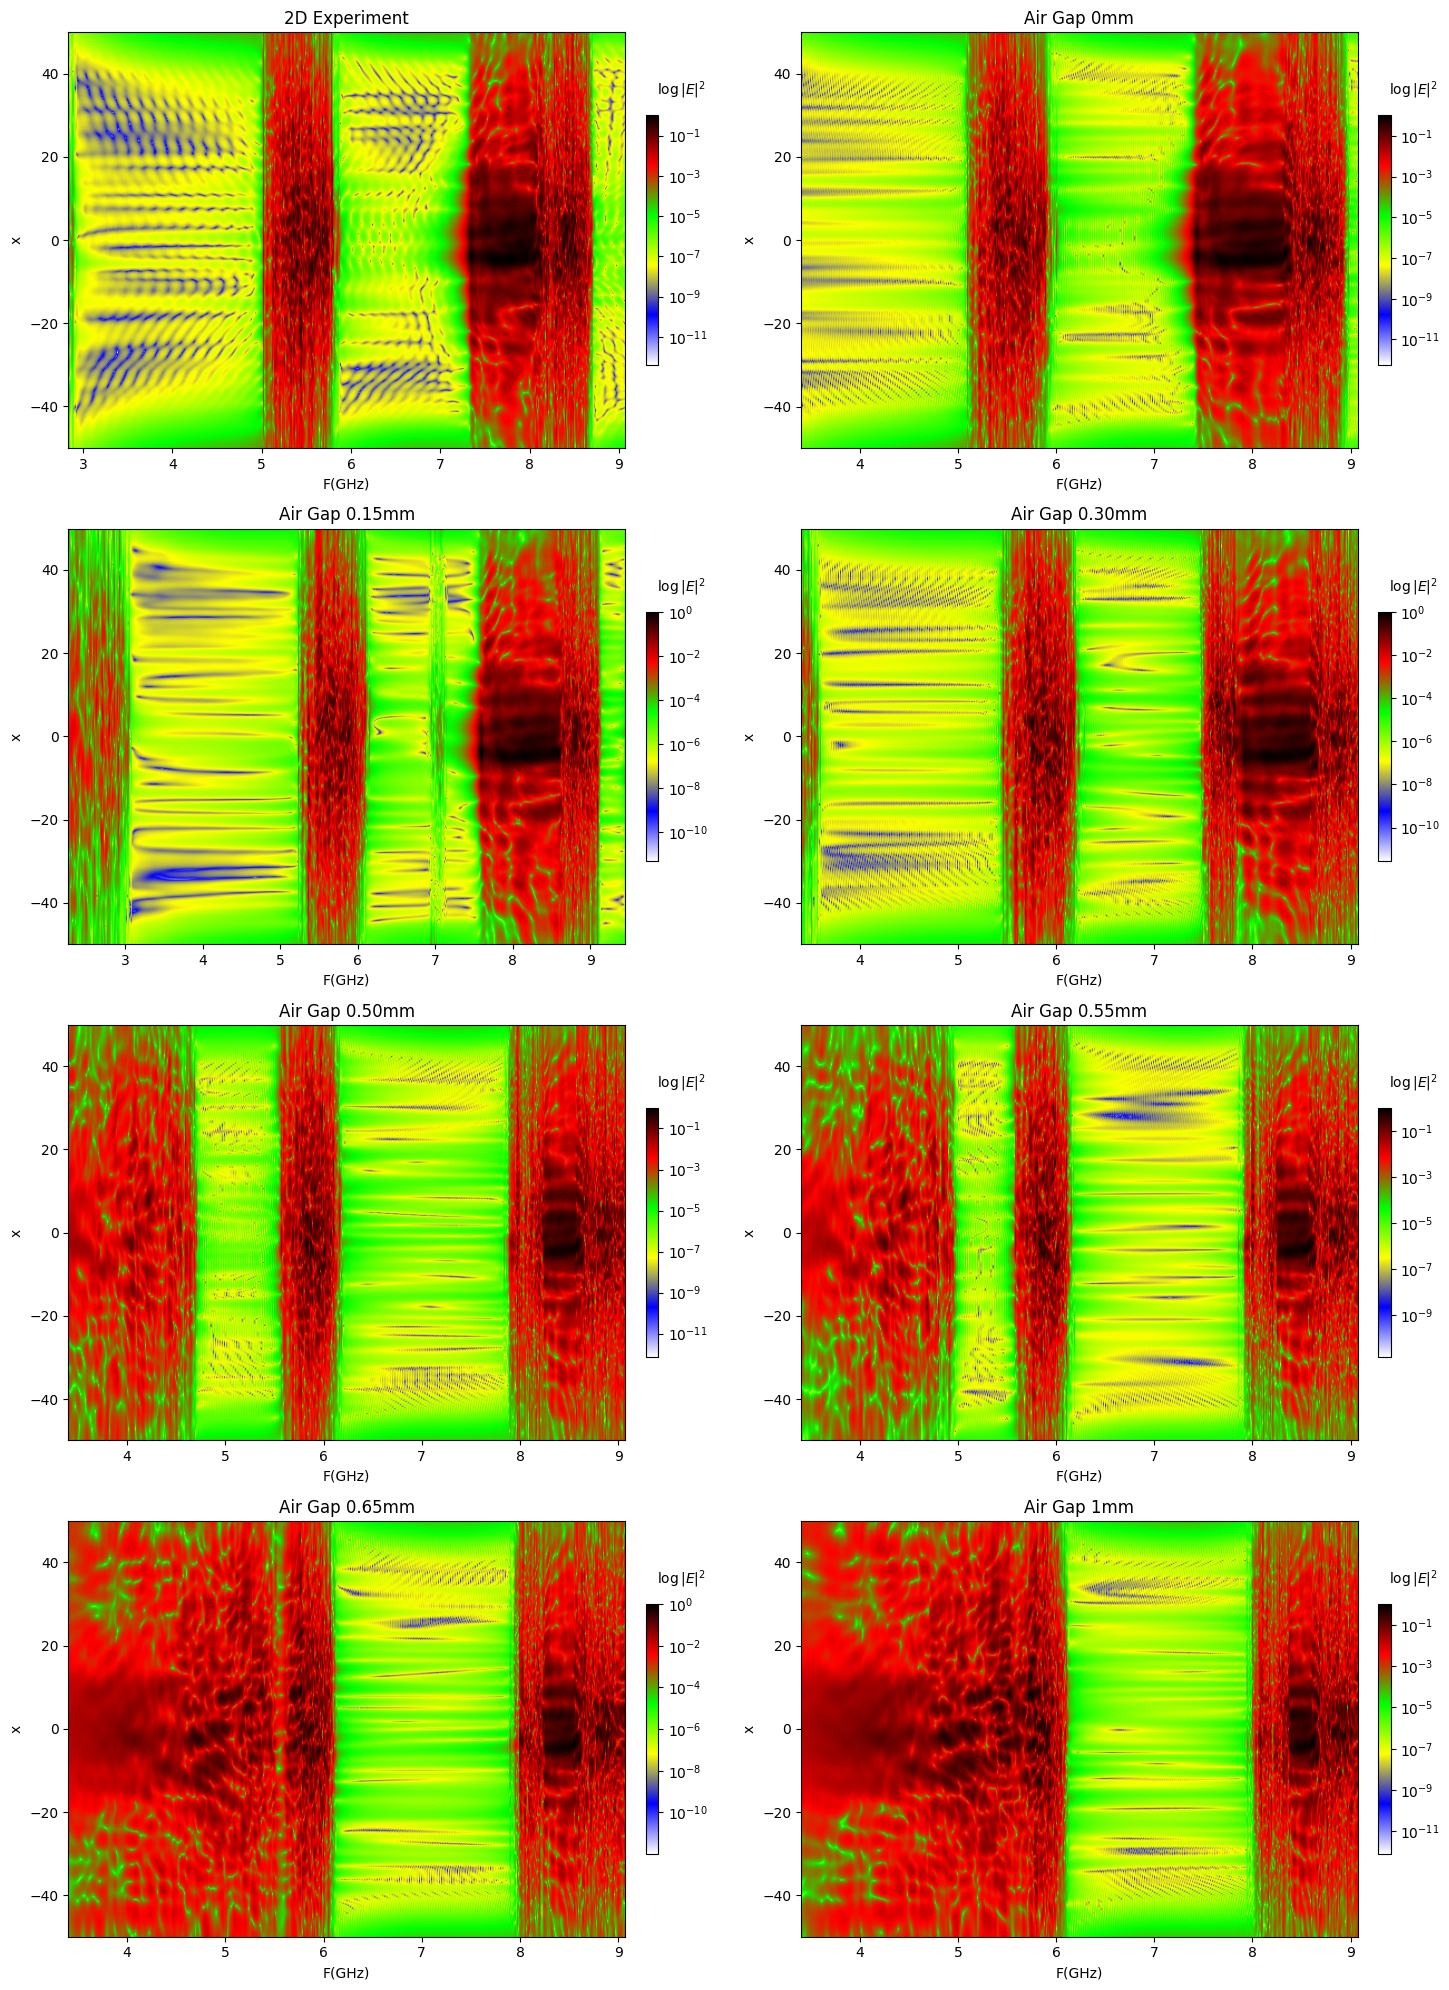

In [19]:
plot_line_intensity(lines,freqs_list,lines_x,title_list)

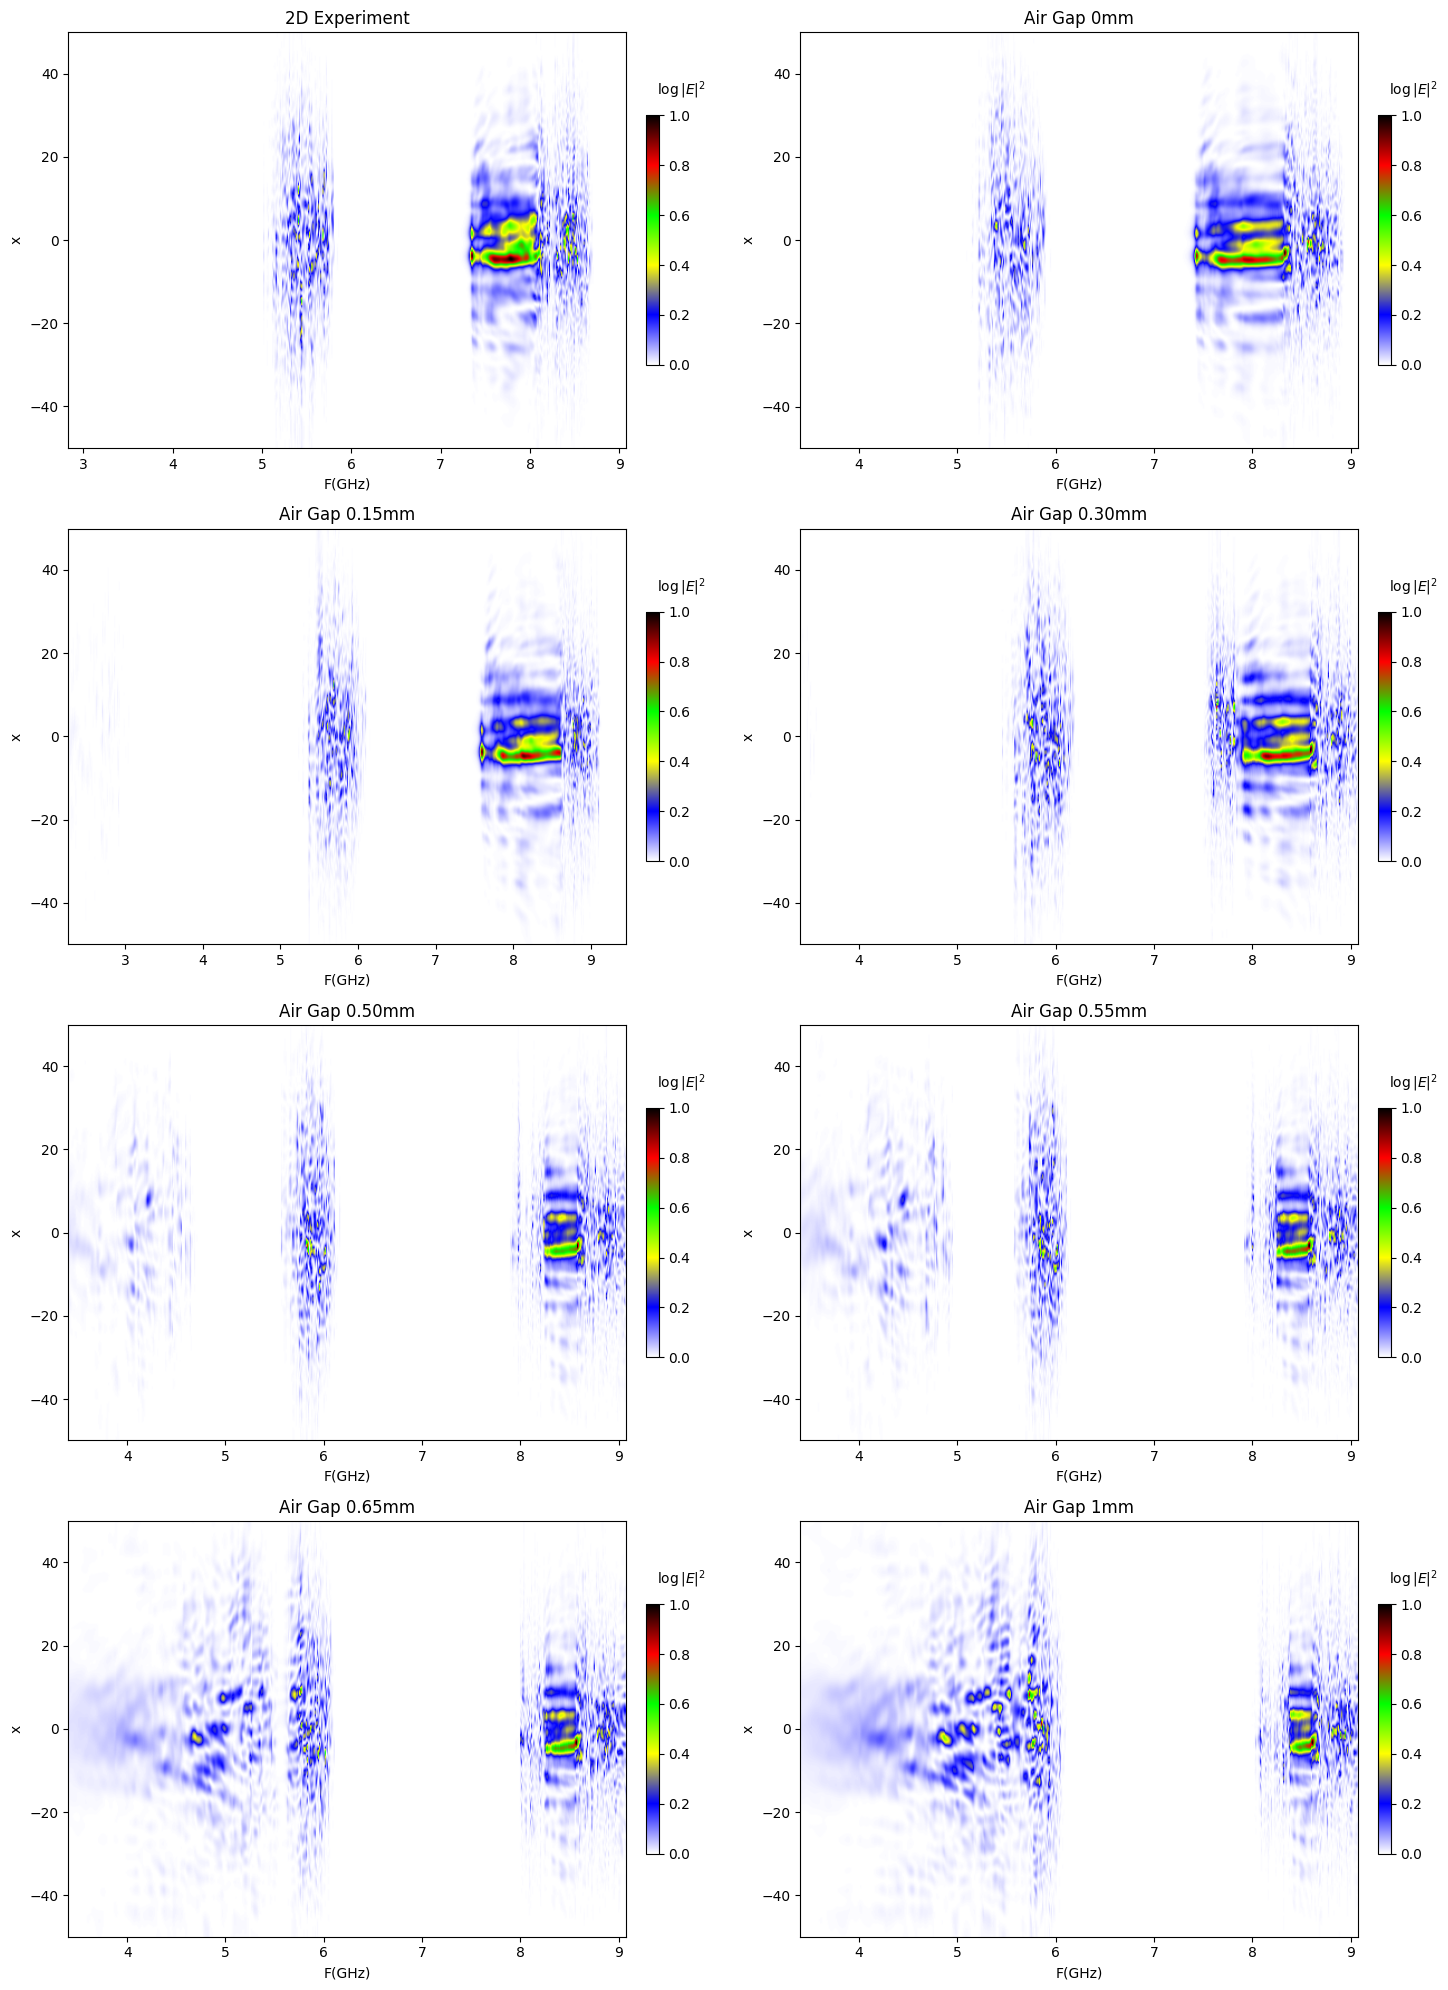

In [20]:
plot_line_intensity(lines,freqs_list,lines_x,title_list,log=False)


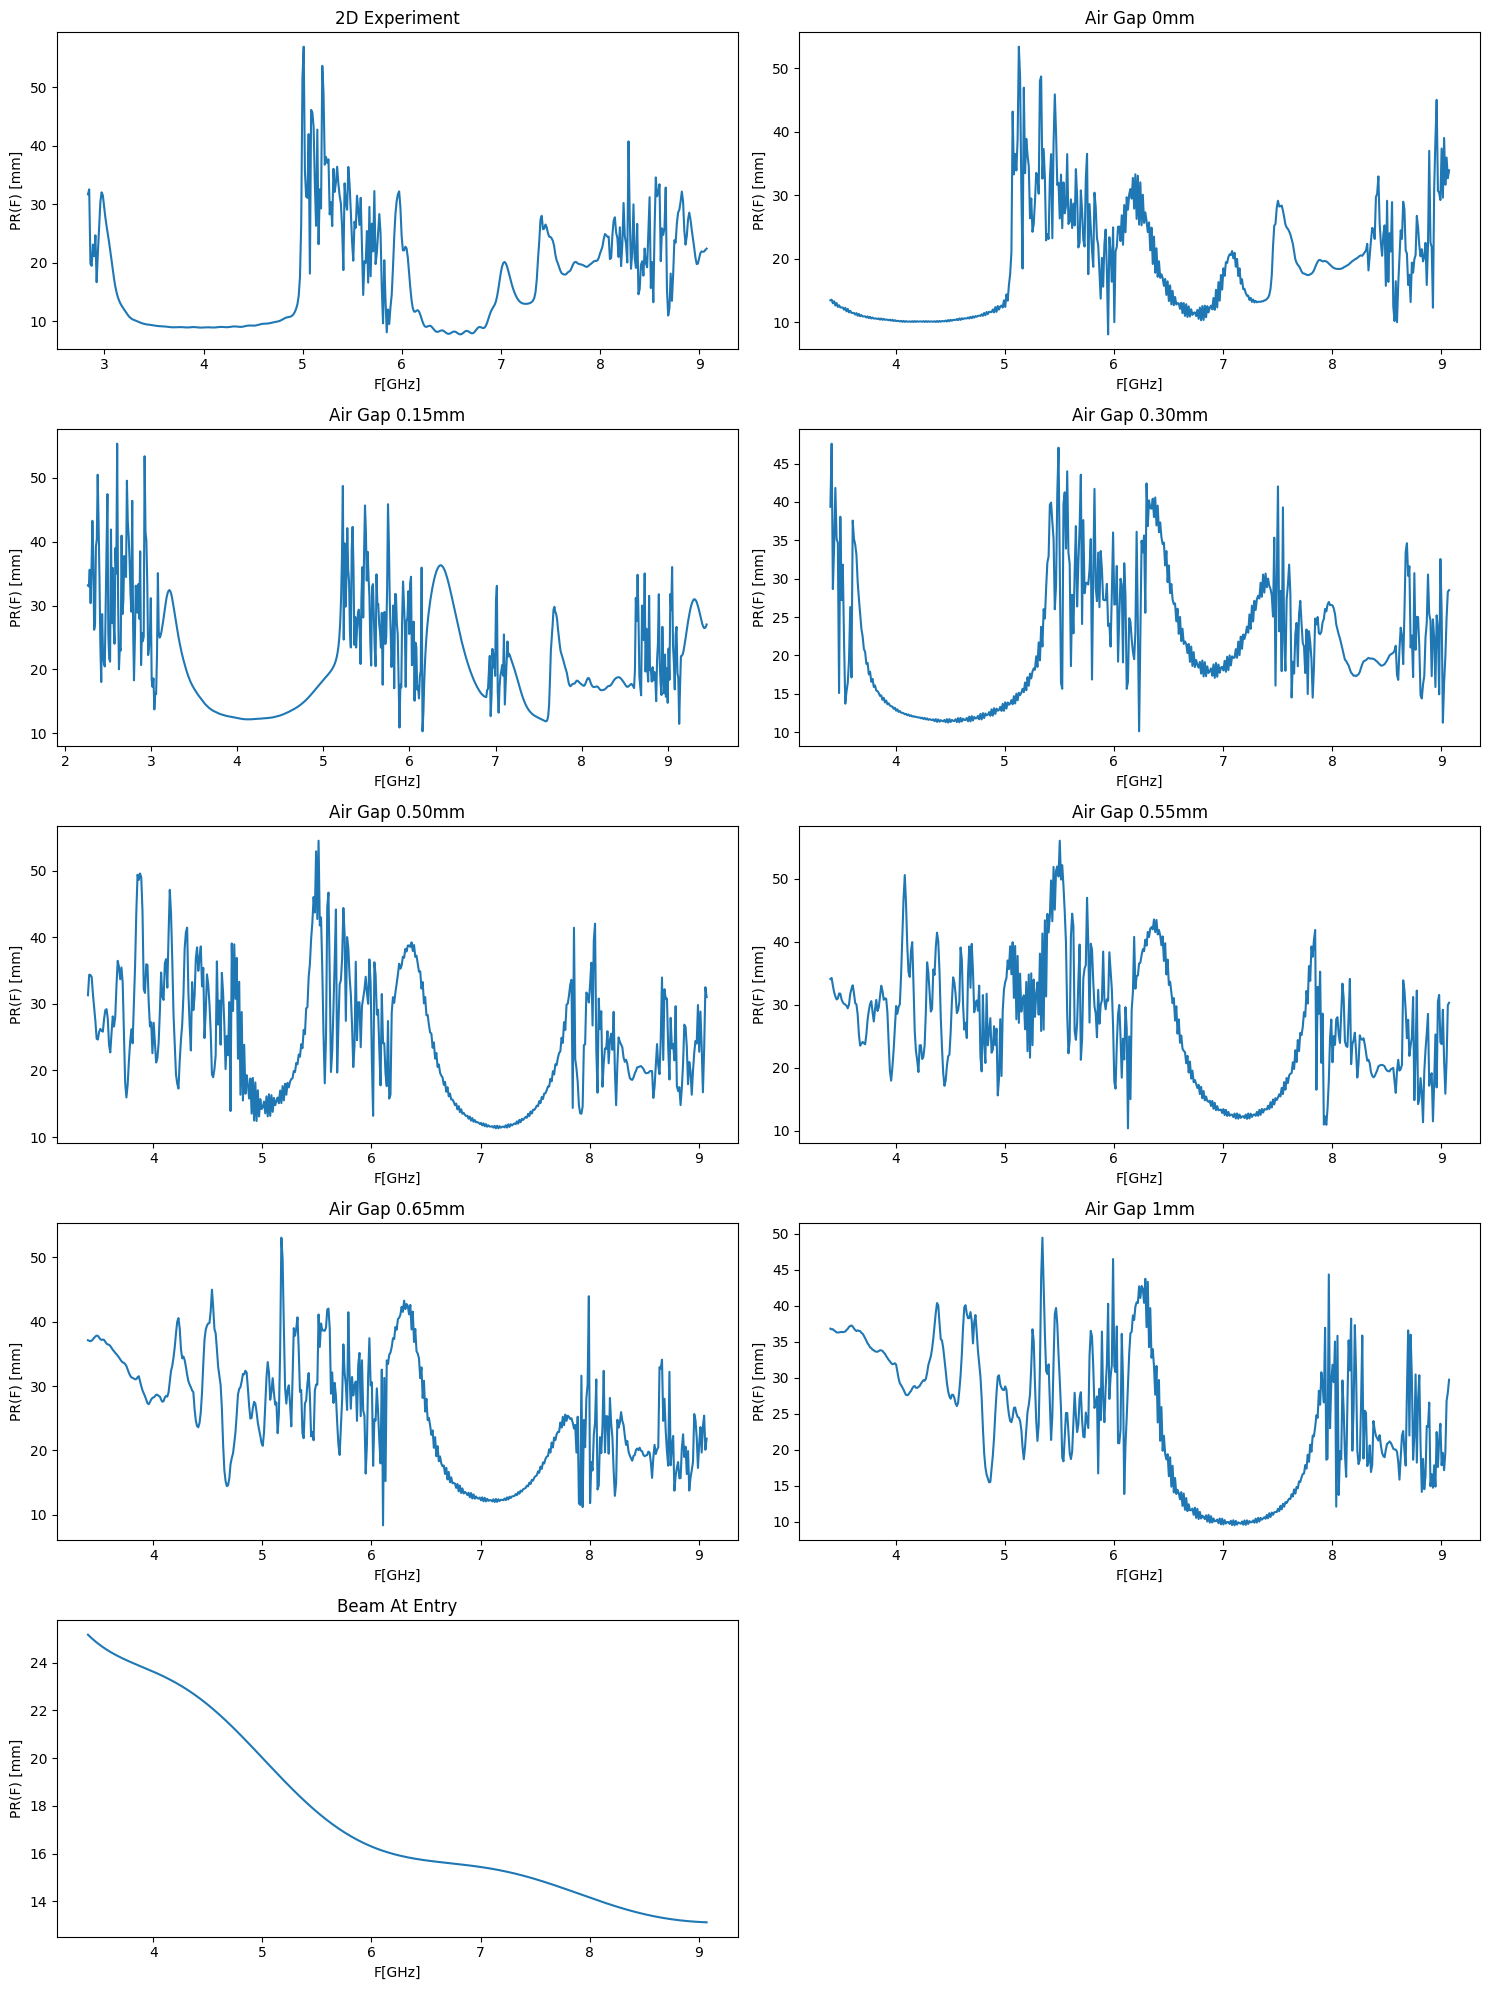

In [21]:
plot_PR(lines,freqs_list,title_list)
